In [34]:
# Import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Load data 
data = pd.read_csv("../data/owid-covid-data.csv")
print("Data loaded. Shape:", data.shape)

# Check overview of data
data.head()


Data loaded. Shape: (429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [35]:
# Drop unnecessary columns
data = data.drop(columns=['iso_code', 'continent','excess_mortality'])

# Check missing values
missing = data.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing.head(10))

# Fill or drop NA values where need 
data['total_cases'] = data['total_cases'].fillna(0)
data['total_deaths'] = data['total_deaths'].fillna(0)
data = data.dropna(subset=['location','date'])

# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

Missing values:
 weekly_icu_admissions                      418442
weekly_icu_admissions_per_million          418442
excess_mortality_cumulative_per_million    416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_absolute       416024
weekly_hosp_admissions                     404938
weekly_hosp_admissions_per_million         404938
icu_patients                               390319
icu_patients_per_million                   390319
hosp_patients                              388779
dtype: int64


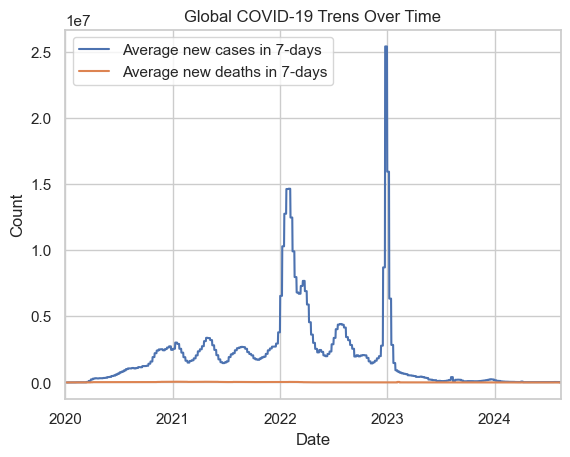

In [36]:
# Group by date globally
global_daily = data.groupby('date')[['new_cases','new_deaths']].sum()

# Plot
plt.Figure(figsize=(14,6))
global_daily['new_cases'].rolling(7).mean().plot(label='Average new cases in 7-days')
global_daily['new_deaths'].rolling(7).mean().plot(label="Average new deaths in 7-days")
plt.title("Global COVID-19 Trens Over Time")
plt.ylabel("Count")
plt.xlabel("Date")
plt.legend()
plt.show()


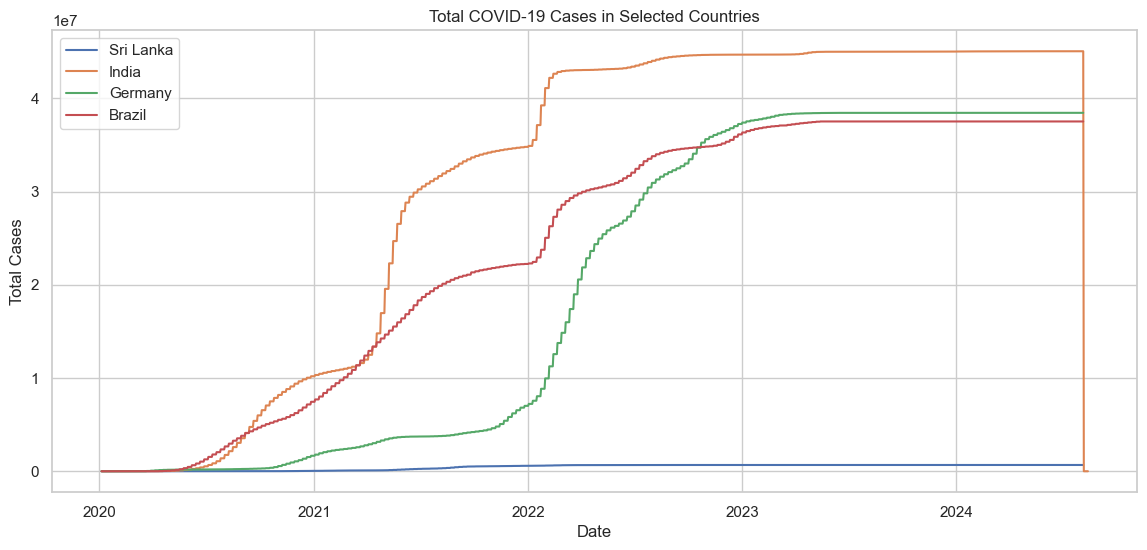

In [43]:
# Filter few countries
countries = ['Sri Lanka', 'India', 'Germany', 'Brazil']
country_data = data[data['location'].isin(countries)]

# Plot total cases over time
plt.figure(figsize=(14,6))
for country in countries:
    subset = country_data[country_data['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases in Selected Countries")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()
